In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [84]:
week_data = [1,2,3,4, 5]
sales_data = [2,4, 5, 4, 5]

In [85]:
df = pd.DataFrame({"Weeks":week_data, "Sales":sales_data})
df

,Weeks,Sales
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


#### Values

In [86]:
# Vlaues of X (x-Axis : Features)
X = df["Weeks"].values
# Values of Y (y-Axis : target)
Y = df["Sales"].values

In [87]:
X

array([1, 2, 3, 4, 5])

In [88]:
Y

array([2, 4, 5, 4, 5])

### Training and Testing Data

Since it is a linear regression we need to find a point where our line can reside.

$$
\sum_{i=1}^n x_i
$$

$$
\sum_{i=1}^n y_i
$$

point :
($\bar{x}$, $\bar{y}$)

Line Equation :
$y = mx + c$


we know :  
    $m = (y₂ - y₁) / (x₂ - x₁)$

for us    :      
    $m =  \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2}$

so for value of c     :     
        $\bar{y} = m\bar{x} + c$

$c = \bar{y} - m\bar{x}$

In [94]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

print(f"mean x : {mean_x}")
print(f"mean y : {mean_y}")

numerator = 0
denominator = 0

for i in range(len(X)):
    numerator +=  (X[i] - mean_x)*(Y[i] - mean_y)
    denominator +=     (X[i] - mean_x)**2

#slop m and c values
m = numerator/denominator
c = mean_y - m*mean_x

print(f"m : {m}")
print(f"c : {c}")

mean x : 3.0
mean y : 4.0
m : 0.6
c : 2.2


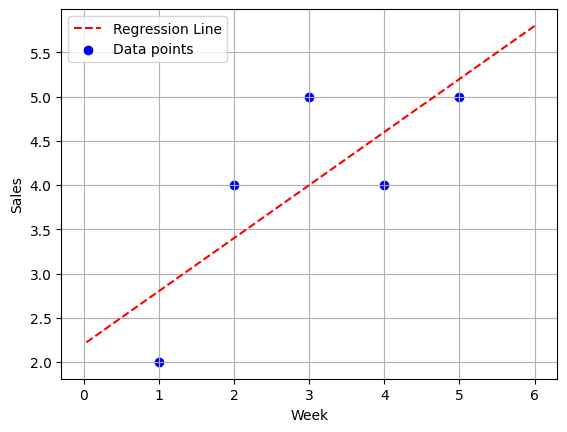

In [106]:
# Graphical view of the above code 

max_x = np.max(X) + 1
min_x = np.min(X) - 1

x = np.linspace(max_x, min_x)
y = m*x + c

plt.plot(x, y, color='red', label='Regression Line', linestyle='--')
plt.scatter(X, Y, color='blue',label='Data points')

plt.xlabel("Week")
plt.ylabel("Sales")
plt.grid(True)
plt.legend(loc='best')


### Residuals

we cant say above line is the best line for this data point so to analyse this we use residuals

Model Evaluation: Examining residuals helps assess how well the regression model fits the data.

$Residual = actual_y_value − predicted_y_value$

The coefficient of determination, or  $R^2$

$R^2 = 1 - \frac{sum squared regression (SSR)}{total sum of squares (SST)}$

$R^2 = \frac{\sum (\hat{y}-\bar{y})^2}{\sum (y - \bar{y})^2}$   OR $R^2 = 1 - \frac{\sum (\hat{y}- y )^2}{\sum (y - \bar{y})^2}$
 



In [118]:
# R2

SSR = 0
SST = 0

for i in range(len(X)):
    y_pred = m*X[i] + c
    SSR += (Y[i] - y_pred)**2
    SST += (Y[i] - mean_y)**2

R2 = 1 - SSR/SST
print(f"R2 : {R2}")

R2 : 0.6000000000000001


### Validate

lets check our above mode is how much accurate.
compared to the actual mode

In [122]:
from sklearn.linear_model import LinearRegression

In [128]:
x = X.reshape(len(X),1) 
x

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [136]:
model = LinearRegression()
model = model.fit(x,Y)

In [137]:
R2 = model.score(x,Y)
R2

0.6000000000000001

Answers are same as expected